<a href="https://colab.research.google.com/github/alldofaiz123/Pemrograman_python/blob/main/Pyhton%202%20grafik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pathloss(d,fc,area,ht,hr):
  if fc >= 400 and fc <= 1500:
    c1 = 69.55
    c2 = 26.16
  elif fc > 1500 and fc <= 2000:
    c1 = 46.3
    c2 = 33.9
  if area == 'urban':
    cm = 0
  elif area == 'open':
    cm = -2*((np.log10((fc/28)**2))-5.4) 
  elif area == 'suburban':
    cm = -4.78*(np.log10(fc))+18.33*(np.log10(fc))-40.94
  else:
    cm = 'Tipe Area Tidak Dikenali'

  ahr = (1.1*np.log10(fc)-0.7)*hr-(1.56*np.log10(fc)-1.8)
  lp = c1+(c2*np.log10(fc))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm

  return lp

In [ ]:
dmin = 200 #Jarak minimum (meter)
dmax = 700 #Jarak maksimum (meter)
N = 200 #Jumlah user
d = np.random.randint(dmin,dmax,N)
f1 = 1800 #Frekuensi 1 (MHz)
f2 = 900 #Frekuensi 2 (MHz)
f3 = 700 #Freuensi 3 (MHz)
area1 = 'urban'
area2 = 'open'
area3 = 'suburban'
ht = 80 #Tinggi Tower (meter)
hr = 1.5 #Tinggi User (meter)

In [ ]:
#Pemanggilan Fungsi 1
lpurban = pathloss(d,f1,area1,ht,hr)
lpopen = pathloss(d,f1,area3,ht,hr)
lpsuburban = pathloss(d,f1,area2,ht,hr)

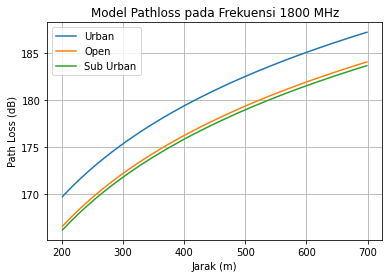

In [ ]:
#Plot 1

#sorting fungsi 1
d_sort = d[np.argsort(d)]
lpurban_sort = lpurban[np.argsort(d)]
lpopen_sort = lpopen[np.argsort(d)]
lpsuburban_sort = lpsuburban[np.argsort(d)]

x = d_sort
y1 = lpurban_sort
y2 = lpopen_sort
y3 = lpsuburban_sort

plt.figure()
plt.grid(True, linestyle='-')
plt.plot(x,y1,label = 'Urban')
plt.plot(x,y2,label = 'Open')
plt.plot(x,y3,label = 'Sub Urban')
plt.legend(loc = 'upper left')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Model Pathloss pada Frekuensi 1800 MHz')
plt.show()

In [ ]:
#Pemanggilan Fungsi 2
lpurban1 = pathloss(d,f3,area1,ht,hr)
lpurban2 = pathloss(d,f2,area1,ht,hr)
lpurban3 = pathloss(d,f1,area1,ht,hr)

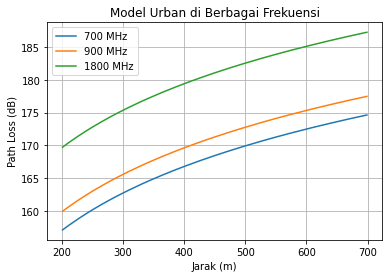

In [ ]:
#Plot 2

#sorting fungsi 2
d_sort = d[np.argsort(d)]
lpurban1_sort = lpurban1[np.argsort(d)]
lpurban2_sort = lpurban2[np.argsort(d)]
lpurban3_sort = lpurban3[np.argsort(d)]

x = d_sort
y1 = lpurban1_sort
y2 = lpurban2_sort
y3 = lpurban3_sort

plt.figure()
plt.grid(True, linestyle='-')
plt.plot(x,y1,label = '700 MHz')
plt.plot(x,y2,label = '900 MHz')
plt.plot(x,y3,label = '1800 MHz')
plt.legend(loc = 'upper left')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Model Urban di Berbagai Frekuensi')
plt.show()